# World Happiness Report - 2024

The World Happiness Report provides a comprehensive assessment of global happiness by integrating diverse factors, including economic performance, public health, social support networks, trust in governance, and more. It ranks countries based on their citizens' self-reported happiness levels, offering a robust framework for evaluating policy effectiveness, governance quality, and cross-national well-being.

This project aims to delve into the distribution of happiness scores across nations, identify key determinants and their interrelationships, and utilize Machine Learning Linear Regression to evaluate the validity of the report’s underlying model. Through this analysis, we seek to uncover insights into the drivers of happiness and their implications for policymaking and societal development.

#### References:
- World Happiness Report website: https://worldhappiness.report/about/
- Dataset: https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2024

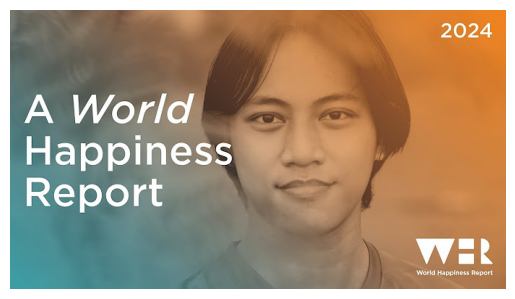

In [46]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/Users/vinitbhanushali/Documents/GitHub/World_Happiness_Index/img.jpg"

img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


## Executive Summary

#### Guide questions: What makes a country happy?
1. What is the distribution of happiness scores around the world?
2. How does each happiness factor correlate with the overall score?
3. How does each happiness factor correlate with one another?
4. What are the most and least sources of happiness for the top and bottom 10 countries?

### Standard Libraries

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Additional Libraries

In [48]:
# For visualizations
import plotly.graph_objs as go # plotly graphical object
from string import ascii_letters
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.cluster import KMeans
from scipy.stats import norm
from scipy import stats

# For scaling dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [49]:
plt.style.use('tableau-colorblind10') #seaborn-whitegrid #tableau-colorblind10 #fivethirtyeight
textColor = '#006680' 
highlightColor = '#3b738f'

### Exploring 2024 data

In [50]:
# Load 2024 data 
df = pd.read_csv(r'/Users/vinitbhanushali/Documents/GitHub/World_Happiness_Index/World Happiness Report 2024.csv')
df.rename(columns = {'Country name' : 'country_name',
                        'Continent' : 'continent', 
                         'Ladder score' : 'happiness_score', 
                        'upperwhisker' : 'upper_whisker', 
                        'lowerwhisker' : 'lower_whisker', 
                        'Explained by: Log GDP per capita' : 'gdp_per_capita_log', 
                        'Explained by: Social support' : 'social_support', 
                        'Explained by: Healthy life expectancy' : 'healthy_life_expectancy', 
                        'Explained by: Freedom to make life choices' : 'freedom_to_make_life_choices', 
                        'Explained by: Generosity' : 'generosity', 
                        'Explained by: Perceptions of corruption' : 'perceptions_of_corruption', 
                        'Dystopia + residual' :'dystopia_residual'}, inplace = True)
df.index = range(1, len(df) + 1)
df.head()

,country_name,continent,happiness_score,upper_whisker,lower_whisker,gdp_per_capita_log,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,dystopia_residual
1,Finland,Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
2,Denmark,Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
3,Iceland,Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
4,Sweden,Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
5,Israel,Asia,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [51]:
df.describe()

,happiness_score,upper_whisker,lower_whisker,gdp_per_capita_log,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,dystopia_residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


In [52]:
# Check null items
df.isna().sum()

country_name                    0
continent                       0
happiness_score                 0
upper_whisker                   0
lower_whisker                   0
gdp_per_capita_log              3
social_support                  3
healthy_life_expectancy         3
freedom_to_make_life_choices    3
generosity                      3
perceptions_of_corruption       3
dystopia_residual               3
dtype: int64

### Distribution of Happiness Scores
- Unimodal distribution
- Spread across the countries
- Mean and Median are within the same values

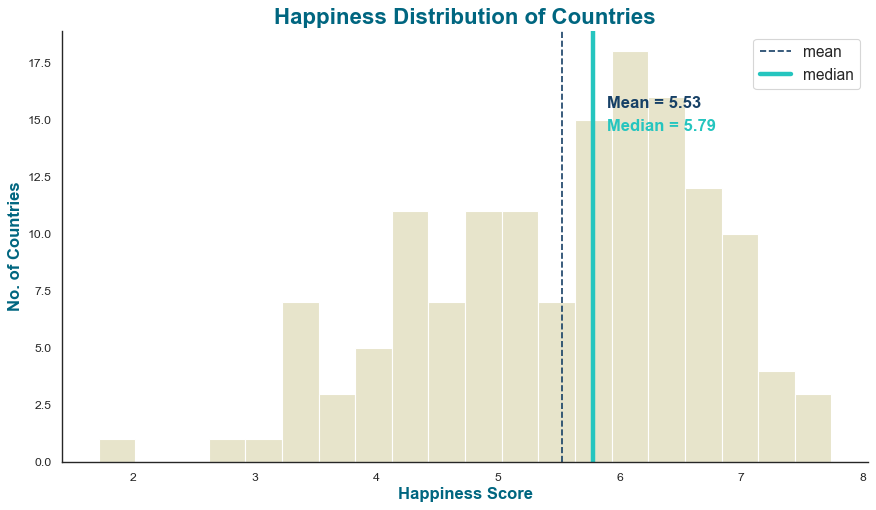

In [53]:
fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims, dpi=80)

# Histogram base
ax = df['happiness_score'].hist(edgecolor='w', bins=20, color='#E7E4CB', ax=ax)
ax.set_title('Happiness Distribution of Countries', color='#006680', fontsize=20, fontweight='bold')
ax.set_xlabel('Happiness Score', color='#006680', fontsize=15, fontweight='bold')
ax.set_ylabel('No. of Countries', color='#006680', fontsize=15, fontweight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)

# Calculate mean and median
mean_val = df['happiness_score'].mean()
median_val = df['happiness_score'].median()

# Mean & Median Annotations
ax.axvline(x=mean_val, color='#164066', linestyle='--', label='mean') 
ax.axvline(x=median_val, color='#25C5BF', linewidth=4, label='median') 
ax.text(5.9, 15.5, f'Mean = {mean_val:.2f}', fontweight='bold', fontsize=15, color='#164066')
ax.text(5.9, 14.5, f'Median = {median_val:.2f}', fontweight='bold', fontsize=15, color='#25C5BF') 
ax.legend(fontsize=14) 

plt.show()

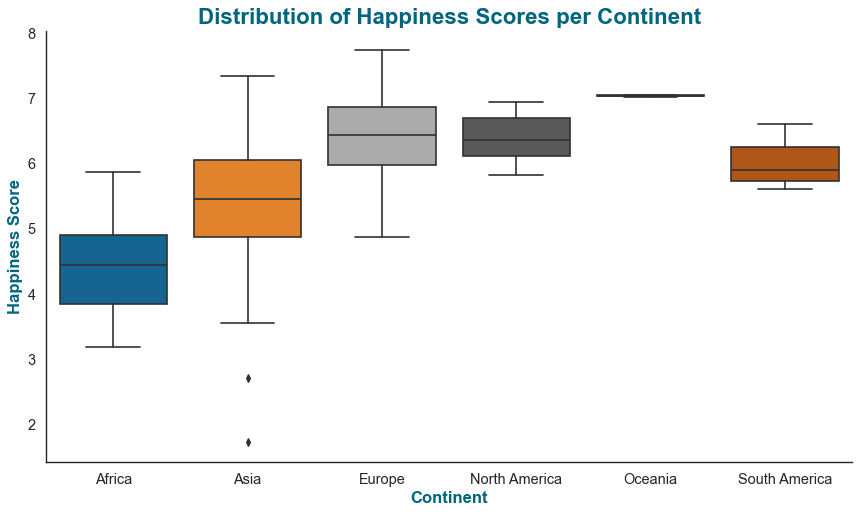

In [54]:
# Boxplot base
plt.style.use('tableau-colorblind10')
fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims, dpi=80)

df['continent'] = df['continent'].astype('category')
sns.boxplot(data=df, x='continent', y='happiness_score')

ax.set_title('Distribution of Happiness Scores per Continent', color='#006680', fontweight='bold', fontsize=20)
ax.set_ylabel('Happiness Score', color='#006680', fontsize=15, fontweight='bold')
ax.set_xlabel('Continent', color='#006680', fontsize=15, fontweight='bold')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=13, rotation=0)

plt.show()

The above Box and Whiskers plot show the distribution and range of scores per continent:
- Europe shows a relatively higher median happiness score compared to other continents. However, it displays notable variability with scores ranging from 4.8 to 7.7. Despite this variation, Europe overall maintains higher happiness scores compared to continents such as Africa and Asia.
- North America demonstrates a more compact range (5.8 to 6.9), indicating less variability in happiness scores, with consistently higher scores above the global average.
- Africa faces significant challenges, with approximately 95% of countries scoring below the global average happiness score (5.52). This suggests systemic issues influencing the overall happiness of African nations.
- Asia ranks as the second lowest continent in terms of happiness scores. Notably, Lebanon and Afghanistan emerge as key outliers, with scores falling below Africa's lowest levels. These outliers underline unique regional or country-specific challenges within Asia.

In [55]:
data = [dict(
    type='choropleth',
    colorscale='RdYlGn',
    locations=df['country_name'],
    z=df['happiness_score'],
    locationmode='country names', 
    marker_line_color='darkgray', 
    colorbar=dict(
        title='Happiness Score', 
        titlefont=dict(size=13),
        tickfont=dict(size=13)
    )
)]
layout = dict(
    title='Happiness Score',
    titlefont=dict(size=20),
    title_x=0.5,
    title_xanchor='center',
    geo=dict(
        showframe=True,
        showcoastlines=True,
        projection=dict(type='equirectangular')
    ),
    width=1005,
    height=500
)

choromap = go.Figure(data=data, layout=layout)
choromap.show()

The observation from the previous figure can be supported through the next Choropleth map, where Europe region is at green, and Africa with red. Africa’s overall representation might have been in red on the Choropleth map if not for Afghanistan’s exceptionally low outlier score of 1.721.

## General Analysis

### How does each factor affect overall happiness or interact with one another?

Economic stability, social support, and healthy life expectancy exhibit a strong correlation with the happiness score, indicating that as these factors improve, overall happiness also increases. This has been a consistently strong pattern observed across previous yearly reports.

A factor-to-factor analysis reveals significant relationships between the following pairs:
- Economy and Social Support
- Economy and Healthy Life Expectancy
- Social Support and Healthy Life Expectancy

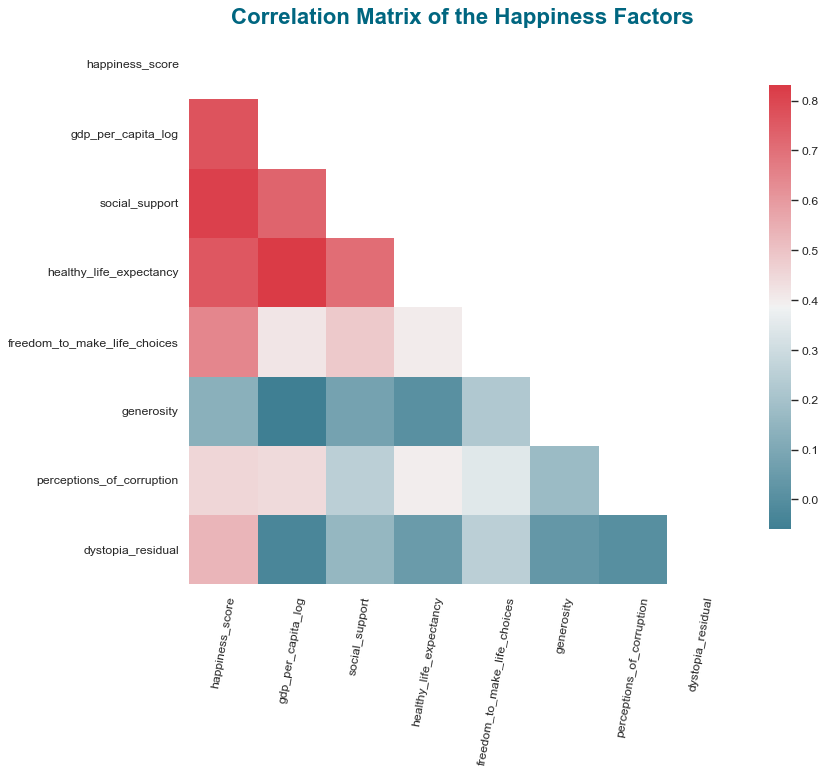

In [56]:
fig_dims = (11, 9) # figure size
fig, ax = plt.subplots(figsize=fig_dims, dpi=80)
cmap = sns.diverging_palette(220, 10, as_cmap=True) # colormap

# Correlation heatmap for the numeric data only
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric = df_numeric.drop(columns=['upper_whisker', 'lower_whisker',], errors='ignore')
corr_matrix = df_numeric.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt=".2f", annot_kws={"size": 12},
            cbar_kws={"shrink": 0.8}, mask=mask)

ax.set_title('Correlation Matrix of the Happiness Factors', color='#006680', fontweight='bold', fontsize=20)
plt.yticks(fontsize=11, rotation=0)
plt.xticks(fontsize=11, rotation=80)

plt.show()

### Three key factors affecting Happiness Scores

Scatterplots for the three key factors show a clear relationship with the happiness score. The plots are color-coded by continent to make the regional patterns easy to see. African countries, marked by blue dots, are mostly in the lower-left quadrant, indicating lower happiness scores. European countries, shown with light gray dots, are in the upper-right quadrant, reflecting higher happiness scores. This pattern is consistent throughout the previous observations.

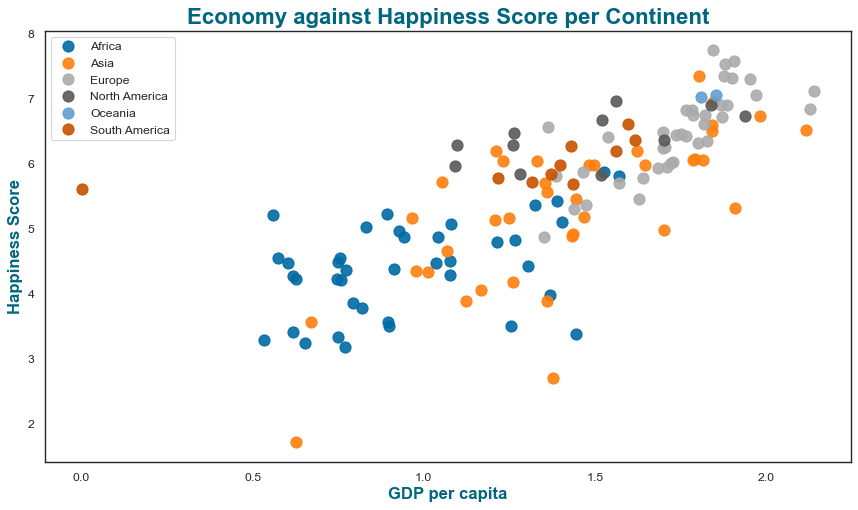

In [57]:
fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims,  dpi=80)

plt.style.use('tableau-colorblind10')
groups = df.groupby("continent")
for name, group in groups:
    plt.plot(group["gdp_per_capita_log"], group["happiness_score"], marker="o", linestyle='', label=name, ms=10, alpha=0.9)
    
ax.set_xlabel('GDP per capita', color='#006680', fontsize=15, fontweight='bold')
ax.set_ylabel('Happiness Score', color='#006680', fontsize=15, fontweight='bold')
ax.set_title('Economy against Happiness Score per Continent', color='#006680', fontweight='bold', fontsize=20);

plt.legend()
plt.show()

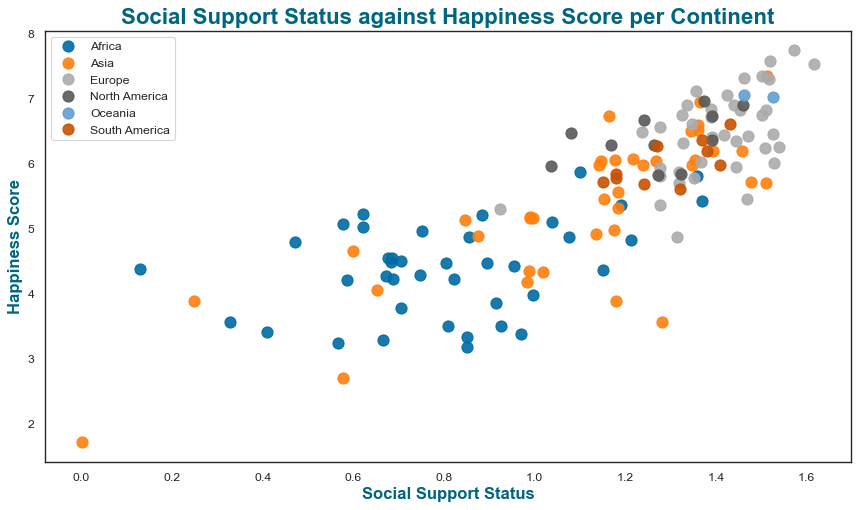

In [58]:
fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims,  dpi=80)

plt.style.use('tableau-colorblind10')
groups = df.groupby("continent")
for name, group in groups:
    plt.plot(group["social_support"], group["happiness_score"], marker="o", linestyle='', label=name, ms=10, alpha=0.9)
    
ax.set_xlabel('Social Support Status', color='#006680', fontsize=15, fontweight='bold')
ax.set_ylabel('Happiness Score', color='#006680', fontsize=15, fontweight='bold')
ax.set_title('Social Support Status against Happiness Score per Continent', color='#006680', fontweight='bold', fontsize=20);

plt.legend()
plt.show()

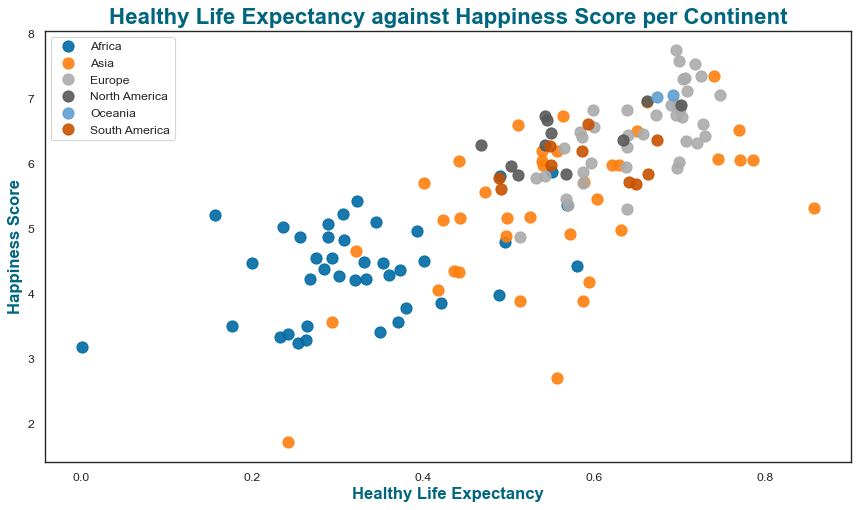

In [59]:
fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims,  dpi=80)

plt.style.use('tableau-colorblind10')
groups = df.groupby("continent")
for name, group in groups:
    plt.plot(group["healthy_life_expectancy"], group["happiness_score"], marker="o", linestyle='', label=name, ms=10, alpha=0.9)
    
ax.set_xlabel('Healthy Life Expectancy', color='#006680', fontsize=15, fontweight='bold')
ax.set_ylabel('Happiness Score', color='#006680', fontsize=15, fontweight='bold')
ax.set_title('Healthy Life Expectancy against Happiness Score per Continent', color='#006680', fontweight='bold', fontsize=20);

plt.legend()
plt.show()

### Strong factor-to-factor relationship
Regression plots were also created for the factors with high correlations to observe the relationships more clearly. The regression line shows an upward trend, confirming the strong correlation between these factors and the happiness score.

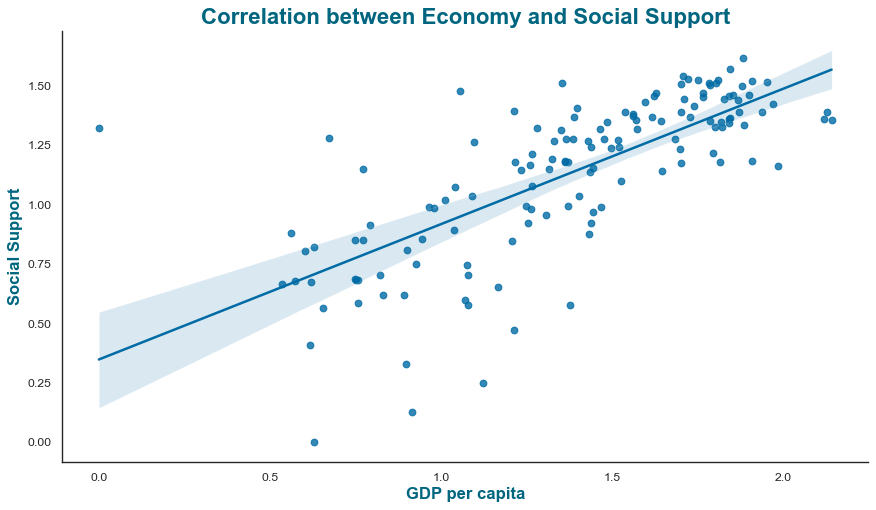

In [60]:
plt.style.use('tableau-colorblind10')

fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims, dpi=80)

sns.regplot(x='gdp_per_capita_log',y='social_support', data=df_numeric)
sns.set(style="white")
plt.xticks(rotation=90)

ax.set_title('Correlation between Economy and Social Support', color='#006680', fontweight='bold', fontsize=20)
ax.set_xlabel('GDP per capita', color='#006680', fontsize=15, fontweight='bold');
ax.set_ylabel('Social Support', color='#006680', fontsize=15, fontweight='bold');
plt.xticks(rotation=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

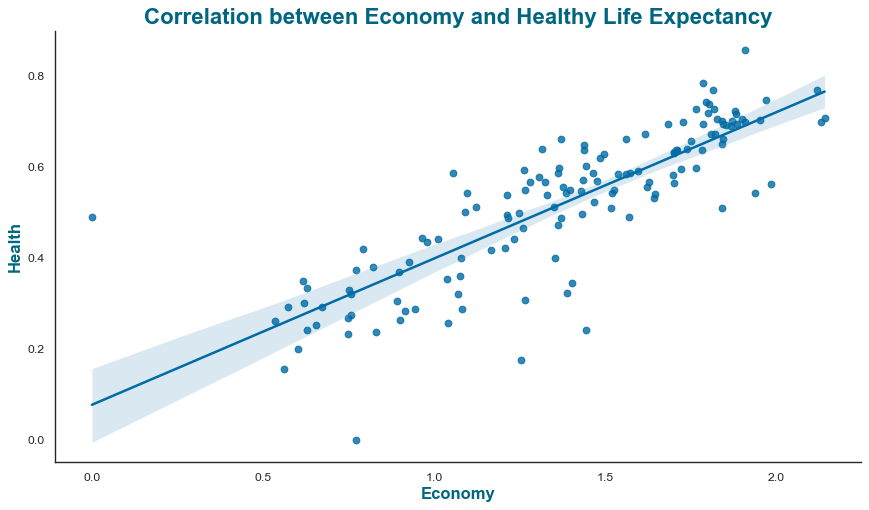

In [61]:
plt.style.use('tableau-colorblind10')

fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims, dpi=80)

sns.regplot(x='gdp_per_capita_log',y='healthy_life_expectancy', data=df_numeric)
sns.set(style="white")
plt.xticks(rotation=90)

ax.set_title('Correlation between Economy and Healthy Life Expectancy', color='#006680', fontweight='bold', fontsize=20)
ax.set_xlabel('Economy', color='#006680', fontsize=15, fontweight='bold');
ax.set_ylabel('Health', color='#006680', fontsize=15, fontweight='bold');
plt.xticks(rotation=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

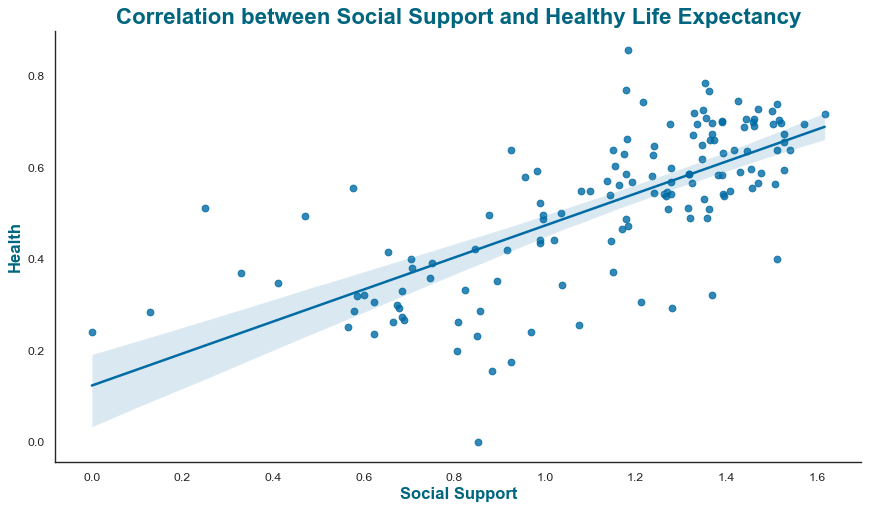

In [62]:
plt.style.use('tableau-colorblind10')

fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims, dpi=80)

sns.regplot(x='social_support',y='healthy_life_expectancy', data=df_numeric)
sns.set(style="white")
plt.xticks(rotation=90)

ax.set_title('Correlation between Social Support and Healthy Life Expectancy', color='#006680', fontweight='bold', fontsize=20)
ax.set_xlabel('Social Support', color='#006680', fontsize=15, fontweight='bold');
ax.set_ylabel('Health', color='#006680', fontsize=15, fontweight='bold');
plt.xticks(rotation=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

### Country Level Analysis: Top 10 and Bottom 10
While economic factors dominate the overall analysis, the country-level factor correlations reveal a different trend for the top 10 and bottom 10 countries.

For the top 10 countries, Social Support and Freedom to Make Life Choices stand out as the most significant factors, whereas generosity has the least effect. Conversely, for the bottom 10 countries, Freedom to Make Life Choices plays a more substantial role, while Perceptions of Corruption or Government Trust have the least influence.

This suggests that for wealthier nations, strong social networks and community ties are crucial to happiness, while for countries facing more significant challenges, having the freedom to make life choices may play a more pivotal role in overall well-being.

In [63]:
df['rank'] = df['happiness_score'].rank(ascending=False, method='min')

In [64]:
top_10 = df[df['rank'] <= 10]
top_10

,country_name,continent,happiness_score,upper_whisker,lower_whisker,gdp_per_capita_log,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,dystopia_residual,rank
1,Finland,Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082,1.0
2,Denmark,Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881,2.0
3,Iceland,Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050,3.0
4,Sweden,Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658,4.0
5,Israel,Asia,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298,5.0
6,Netherlands,Europe,7.319,7.383,7.256,1.901,1.462,0.706,0.725,0.247,0.372,1.906,6.0
7,Norway,Europe,7.302,7.389,7.215,1.952,1.517,0.704,0.835,0.224,0.484,1.586,7.0
8,Luxembourg,Europe,7.122,7.213,7.031,2.141,1.355,0.708,0.801,0.146,0.432,1.540,8.0
9,Switzerland,Europe,7.060,7.147,6.973,1.970,1.425,0.747,0.759,0.173,0.498,1.488,9.0
10,Australia,Oceania,7.057,7.141,6.973,1.854,1.461,0.692,0.756,0.225,0.323,1.745,10.0


In [65]:
bottom_10 = df[df['rank'] > len(df) - 10]
bottom_10

,country_name,continent,happiness_score,upper_whisker,lower_whisker,gdp_per_capita_log,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,dystopia_residual,rank
134,Zambia,Africa,3.502,3.636,3.368,0.899,0.809,0.264,0.727,0.168,0.109,0.526,134.0
135,Eswatini,Africa,3.502,3.673,3.331,1.255,0.925,0.176,0.284,0.059,0.116,0.686,134.0
136,Malawi,Africa,3.421,3.561,3.281,0.617,0.410,0.349,0.571,0.135,0.136,1.203,136.0
137,Botswana,Africa,3.383,3.558,3.209,1.445,0.969,0.241,0.567,0.014,0.082,0.066,137.0
138,Zimbabwe,Africa,3.341,3.457,3.226,0.748,0.850,0.232,0.487,0.096,0.131,0.797,138.0
139,Congo (Kinshasa),Africa,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102,139.0
140,Sierra Leone,Africa,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068,140.0
141,Lesotho,Africa,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875,141.0
142,Lebanon,Asia,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,142.0
143,Afghanistan,Asia,1.721,1.775,1.667,0.628,0.000,0.242,0.000,0.091,0.088,0.672,143.0


In [66]:
df_sort_happiness = df.sort_values(by = ["happiness_score"])
top10_countries = df_sort_happiness["country_name"].tail(10).values
bottom10_countries = df_sort_happiness["country_name"].head(10).values

In [67]:
# Normalize to make variables comparable
min_max_scaler = preprocessing.MinMaxScaler()
columns = ['gdp_per_capita_log', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']
df_sort_happiness = df_sort_happiness[columns]
df_sort_happiness = df_sort_happiness.dropna()
df_sort_happiness = pd.DataFrame(min_max_scaler.fit_transform(df_sort_happiness[columns]), columns = columns)

df_sort_happiness.columns = ['gdp_per_capita_log', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']
df_sort_happiness.shape

(140, 6)

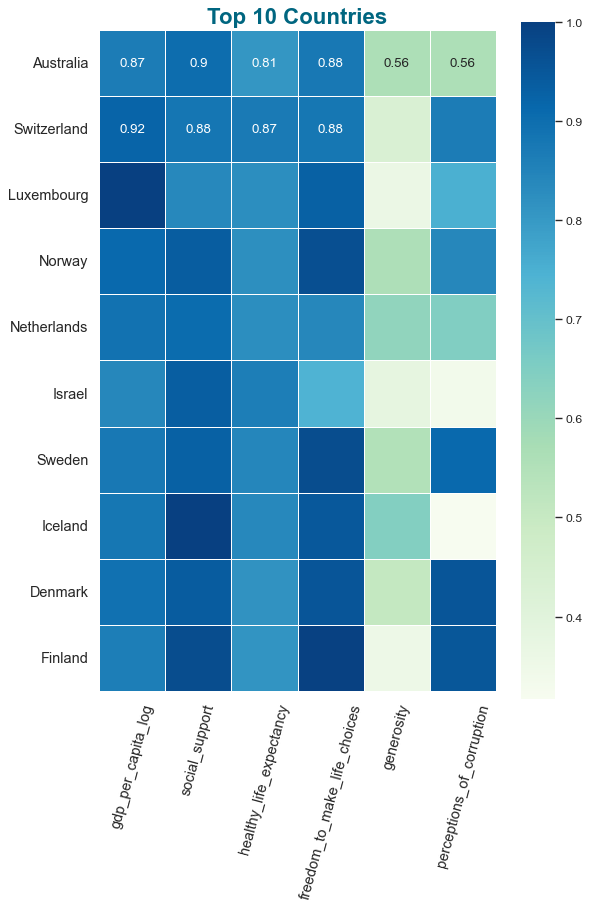

In [ ]:
df_top10 = df_sort_happiness.tail(10)

Index = top10_countries 
Cols = list(df_top10.columns)

fig_dims = (8, 11)
fig, ax = plt.subplots(figsize=fig_dims,  dpi=80)
df_top10_heat = pd.DataFrame(df_top10.values,index = Index, columns = Cols)
sns.heatmap(df_top10_heat, cbar = True, square = True, annot=True, cmap='GnBu', linewidths = .5)

plt.yticks(rotation=0) 
ax.set_title('Top 10 Countries', color='#006680', fontweight='bold', fontsize=20)
plt.yticks(fontsize=13, rotation=0)
plt.xticks(fontsize=13, rotation=75)
plt.show()

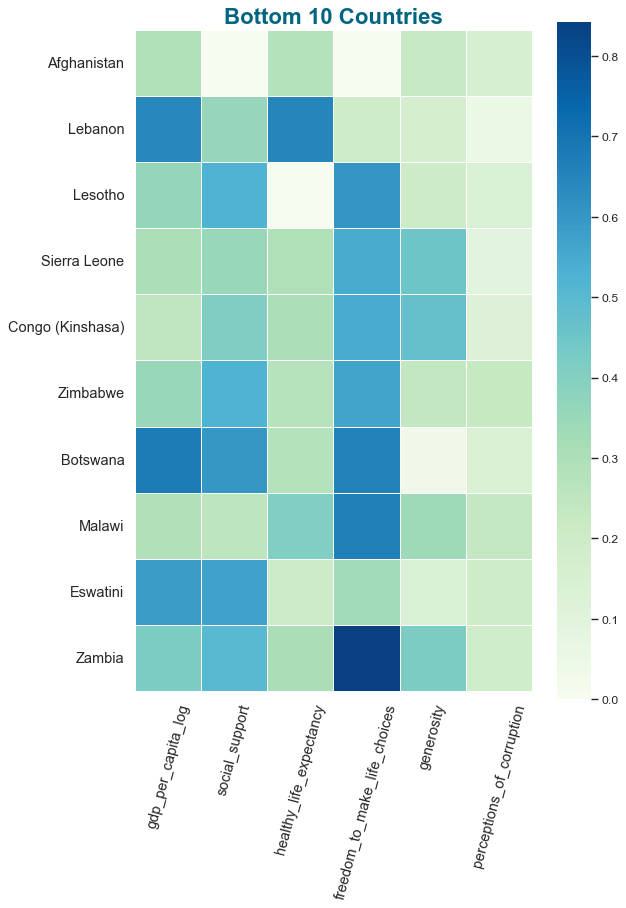

In [73]:
df_bottom10 = df_sort_happiness.head(10)

Index = bottom10_countries 
Cols = list(df_bottom10.columns)

fig_dims = (8, 11)
fig, ax = plt.subplots(figsize=fig_dims,  dpi=80)
df_bottom10_heat = pd.DataFrame(df_bottom10.values,index = Index, columns = Cols)
sns.heatmap(df_bottom10_heat, cbar = True, square = True, annot=True, cmap='GnBu', linewidths = .5)

plt.yticks(rotation=0) 
ax.set_title('Bottom 10 Countries', color='#006680', fontweight='bold', fontsize=20)
plt.yticks(fontsize=13, rotation=0)
plt.xticks(fontsize=13, rotation=75)
plt.show()

## Model Exploration and Machine Learning

### Frequency and Distribution of Data

In [27]:
df[['gdp_per_capita_log', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']].describe()

,gdp_per_capita_log,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121
std,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750
50%,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500
75%,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750
max,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000


Frequency and Distribution of Data


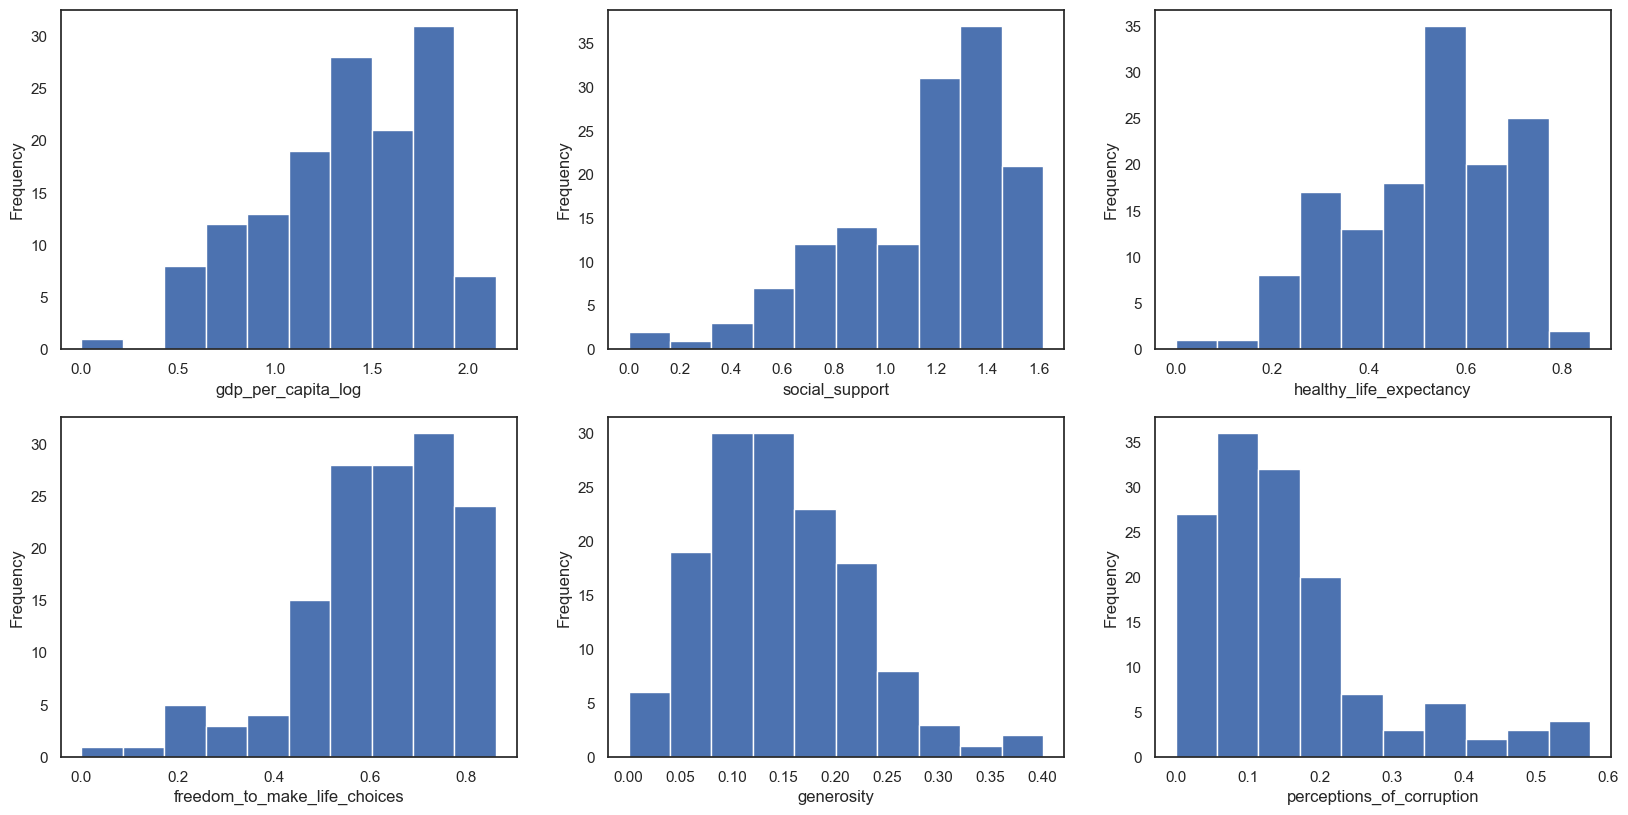

In [28]:
cols = ['gdp_per_capita_log', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']
print("Frequency and Distribution of Data")

plt.figure(figsize = (20, 15))
for num in range(len(cols)):
    plt.subplot(3, 3, num+1)
    plt.hist(df[cols[num]])
    plt.ylabel('Frequency')
    plt.xlabel(cols[num])
plt.show()

### Analyzing the behavior of each factor

Regression analysis was used to examine the six independent variables in the dataset. The following visualizations display the relationships between these factors and the Happiness Score. A strong linear relationship with the happiness score is shown for Economy, Social Support, and Healthy Life Expectancy. Perception of Corruption and Generosity are found to have little impact on the happiness score, while a mild linear relationship is observed for Freedom to Make Life Choices.

The succeeding linear regression model for Economy, Social Support, and Health confirms the correlation matrix results. The trend observed in the scatterplot above also visualizes the R-squared values derived from the following code.

In [29]:
# Dropping (Bahrain, Tajikistan, & State of Palestine) from list of countries due to missing data for specific factors
df_clean = df.dropna()
X = df_clean[['gdp_per_capita_log', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']] #Subsetting the data
Y = df_clean['happiness_score']
X=X.dropna()

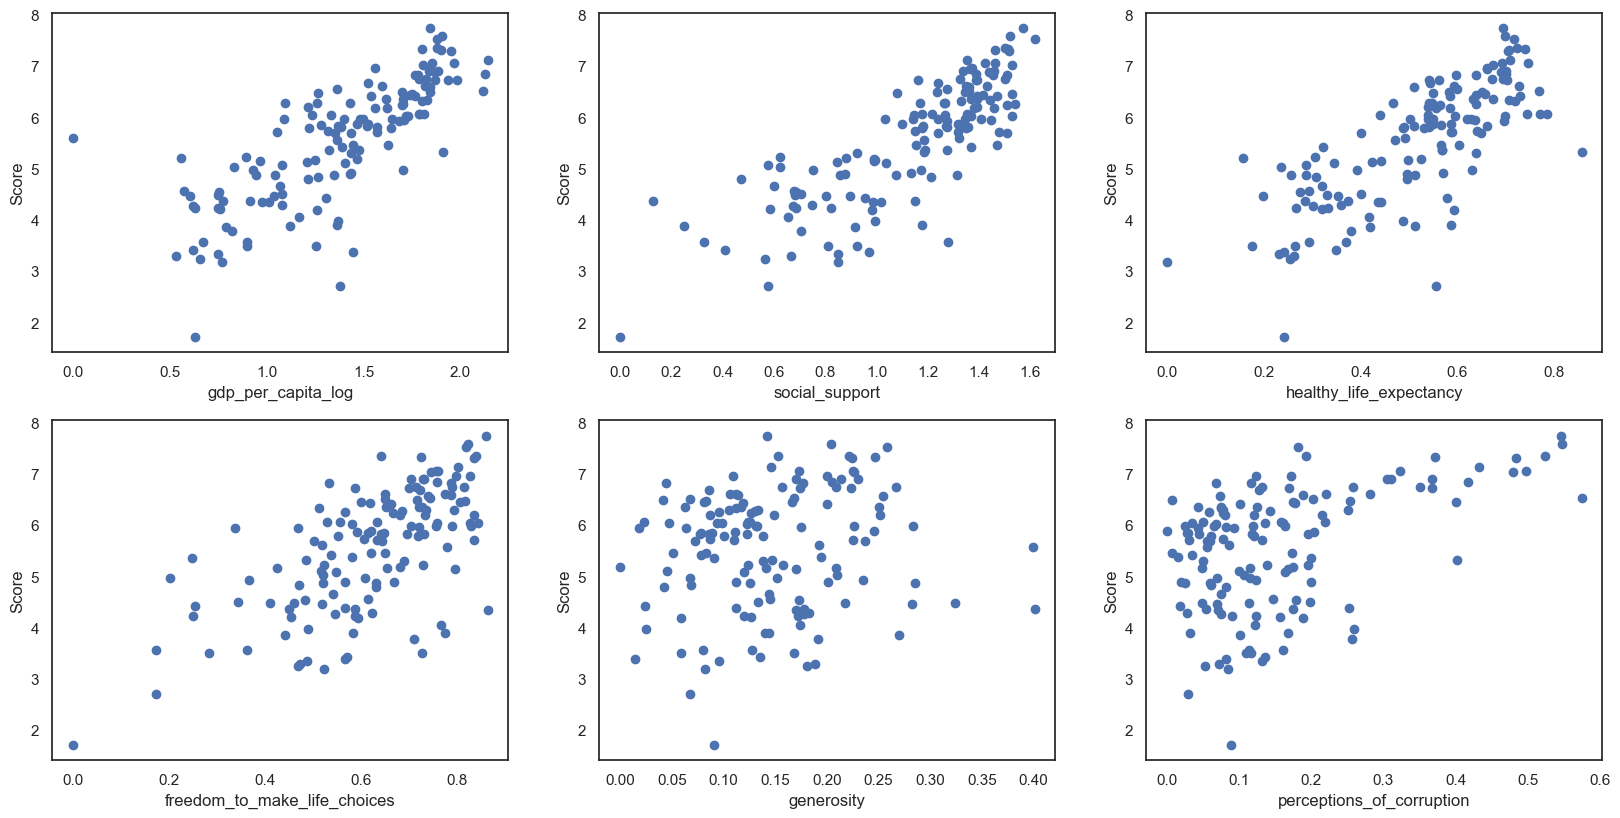

In [30]:
sns.set_style("white")
cols = ['gdp_per_capita_log', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']
plt.figure(figsize = (20, 15))

for num in range(len(cols)):
    plt.subplot(3, 3, num+1)
    plt.scatter(df_clean[cols[num]], df_clean['happiness_score'])
    plt.ylabel('Score')
    plt.xlabel(cols[num])
    
plt.show()

In [31]:
# get R^2, fitness of model
for var in cols:
    lin_reg = LinearRegression().fit(X[[var]], Y)
    print("R-squared for {}: {}".format(var, round(lin_reg.score(X[[var]], Y), 4)))

R-squared for gdp_per_capita_log: 0.5906
R-squared for social_support: 0.6619
R-squared for healthy_life_expectancy: 0.5771
R-squared for freedom_to_make_life_choices: 0.4153
R-squared for generosity: 0.0169
R-squared for perceptions_of_corruption: 0.2041


## Building the Linear Regression Model

The three key factors with the highest correlation scores against Happiness are:
- Economy (GDP per Capita)
- Social Support
- Healthy Life Expectancy

These factors are also shown to have a positive linear relationship with Happiness. These key factors will be used as independent variables in the linear regression model, with Happiness score as the dependent variable.

To start building the model, variables that are least correlated and have no direct relationship with the happiness score are first removed.

A histogram is plotted to verify the distribution of the data. Once the data is confirmed to normally distributed, linear regression model can be built.

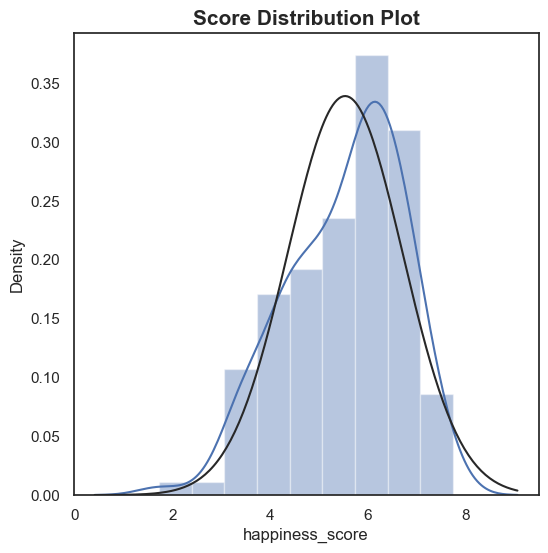

In [35]:
#Model Prediction
model = df_clean[['gdp_per_capita_log', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']] #Subsetting the data

plt.figure(figsize=(6,6))
sns.distplot(Y, fit = norm)
plt.title("Score Distribution Plot",size=15, weight='bold')
#plt.savefig('NormalDistribution_Happiness.png')
plt.show()

### Splitting the dataset into Train and Test sets
The data was split into training and test sets, with 70% allocated to the training set and 30% to the test set. The linear model was trained using the training data, and the test data was used to predict the Happiness Score.

In [36]:
# Split the dataset to training and testing set

df_train, df_test = train_test_split(df_clean, test_size=0.3, random_state=1)

x_train = df_train[['gdp_per_capita_log', 'social_support', 'healthy_life_expectancy']]
y_train = df_train['happiness_score']

x_test = df_test[['gdp_per_capita_log', 'social_support', 'healthy_life_expectancy']]
y_test = df_test['happiness_score']

### Scale the dataset

In [37]:
#NOTE: Only scale the predictor variables, NOT the target variable

#Instantiate the Scaler
scaler = StandardScaler()

#Fit to the TRAIN set
scaler.fit(x_train)

#Apply to the TRAIN set
x_train_s = scaler.transform(x_train)

#Apply to the TEST set
x_test_s = scaler.transform(x_test)

#Convert to DataFrame for viewing
x_train_sdf = pd.DataFrame(x_train_s, columns=x_train.columns, index=x_train.index)
x_test_sdf = pd.DataFrame(x_test_s, columns=x_test.columns, index=x_test.index)

In [38]:
x_train_sdf.head()

,gdp_per_capita_log,social_support,healthy_life_expectancy
108,-0.705204,-1.395763,-1.175149
76,0.512743,0.638654,0.479301
13,1.177519,0.768993,0.939561
3,1.264862,1.485856,1.294086
49,0.636479,1.032504,0.286489


### Train the model

In [39]:
#Instantiate the Linear Regression Algorithm
linreg = linear_model.LinearRegression()

#Train the Model
linreg.fit(x_train_sdf, y_train)

LinearRegression()

### Get the coefficients

In [40]:
pd.DataFrame(linreg.coef_, index=x_train.columns, columns=['Coef'])

,Coef
gdp_per_capita_log,0.363115
social_support,0.584424
healthy_life_expectancy,0.167350


## Model Validation

In [41]:
# Predict the values
y_pred = linreg.predict(x_test_sdf)

In [42]:
# Measure the performance of the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(("r2: %.2f") %r2)
print(("mae: %.2f") %mae)
print(("mse: %.2f") %mse)
print(("rmse: %.2f") %rmse)

r2: 0.77
mae: 0.40
mse: 0.25
rmse: 0.50


In [43]:
lm_results = pd.DataFrame(y_test)
lm_results["Predicted"] = y_pred
lm_results.head()

,happiness_score,Predicted
67,5.842,5.821034
59,5.975,5.815647
43,6.284,5.532780
110,4.548,3.996280
6,7.319,6.741326


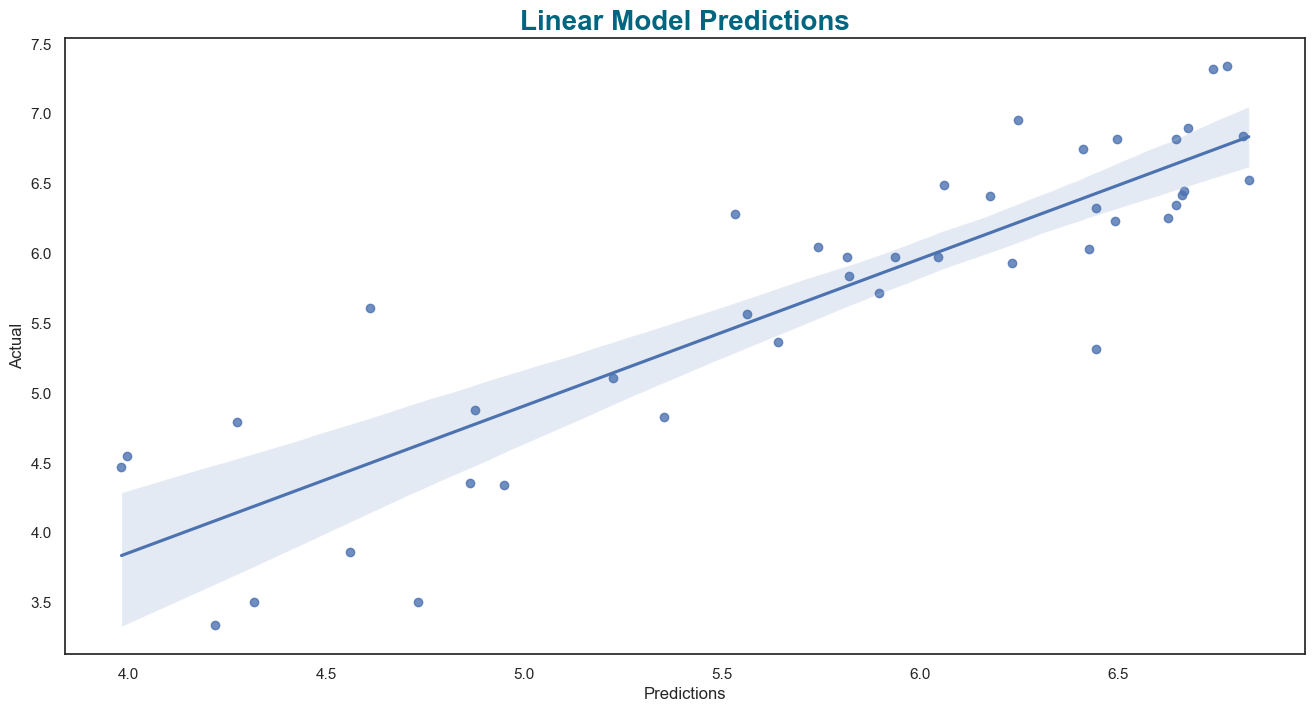

In [44]:
# Plotting the linear regression model
plt.figure(figsize=(16,8))
sns.regplot(x=y_pred,y=y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Model Predictions", color='#006680', fontweight='bold', fontsize=20)
plt.grid(False)
plt.savefig('LinearModelPrediction.png')
plt.show()

The data points align closely with the regression line, indicating a strong fit. This also highlights the positive correlation with the three key factors. With an R-squared value of 0.77, the model shows a solid fit, demonstrating that the regression model effectively captures the patterns in the happiness dataset.

To evaluate the model, the key independent variables (x) were plotted against the dependent variable (y), which showed a strong positive linear relationship. This visualization highlighted how well the model captures the correlation between the factors and Happiness. When the Happiness Scores were predicted using the linear model, the results aligned with expectations, indicating a positive outcome and reinforcing the model’s predictive accuracy.

##### Summary:
This analysis of the **World Happiness Report 2024** reveals that happiness is significantly influenced by economic stability, social support, and health. European countries dominate the happiness rankings, while Africa and Asia struggle due to systemic challenges and regional outliers.

#### Key Insights:
1. **Strong Predictors of Happiness:**  
   - Social Support (R² = 0.66)  
   - GDP per Capita (R² = 0.59)  
   - Healthy Life Expectancy (R² = 0.57)

2. **Limited Impact:**  
   - Generosity (R² = 0.017)  
   - Perceptions of Corruption (R² = 0.20)

3. **Model Performance:**  
   - R² = 0.77, indicating good explanatory power of the regression model.

The findings emphasize the importance of fostering strong community networks, improving economic conditions, and prioritizing public health to enhance global happiness levels.